In [1]:
import json
import requests
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split


from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Activation, Dense
from keras.metrics import Accuracy

In [2]:
r = requests.get("http://192.168.15.131:5000/api/v0.01/selfbalancing/mongodb/all")
if r.status_code == 200:
    register = json.loads(r.content)

In [3]:
df = pd.read_json(json.dumps(register))

In [4]:
df.head()

,gyroy,kalangley,kd,ki,kp,pitch,res
0,-145,-83.30,1,5,22,-83.20,200
1,-155,-83.30,1,5,22,-83.14,200
2,-146,-83.31,1,5,22,-83.48,200
3,-110,-83.31,1,5,22,-83.36,200
4,-99,-83.32,1,5,22,-83.54,200


In [5]:
# df.gyroy = df.gyroy.astype(float)
# df.kalangley = df.kalangley.astype(float)
# df.kd = df.kd.astype(float)
# df.ki = df.ki.astype(float)
# df.kp = df.kp.astype(float)
# df.pitch = df.pitch.astype(float)
# df.res = df.res.astype(float)

In [6]:
df.shape

(1575, 7)

In [7]:
df.head()

,gyroy,kalangley,kd,ki,kp,pitch,res
0,-145,-83.30,1,5,22,-83.20,200
1,-155,-83.30,1,5,22,-83.14,200
2,-146,-83.31,1,5,22,-83.48,200
3,-110,-83.31,1,5,22,-83.36,200
4,-99,-83.32,1,5,22,-83.54,200


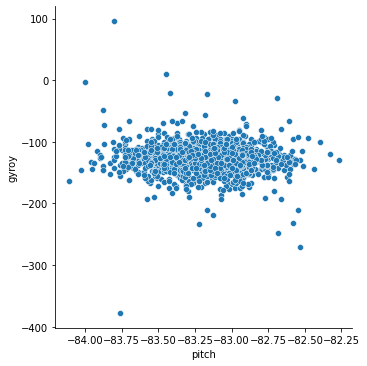

In [8]:
sns.relplot(x = "pitch", y = "gyroy", data = df)

In [9]:
for x in range(len(df)):
    if -150 < df["gyroy"][x] < -100:
        df.loc[x, "up"] = 1
    else:
        df.loc[x, "up"] = 0

In [10]:
df.sample(10)

,gyroy,kalangley,kd,ki,kp,pitch,res,up
1456,-127,-83.13,1,5,22,-83.08,200,1.0
80,-131,-83.33,1,5,22,-83.01,200,1.0
517,-127,-83.37,1,5,22,-83.18,200,1.0
400,-147,-83.10,1,5,22,-83.07,200,1.0
1491,-114,-83.19,1,5,22,-83.65,200,1.0
1432,-148,-83.10,1,5,22,-83.18,200,1.0
1243,-119,-83.16,1,5,22,-83.10,200,1.0
1553,-119,-83.21,1,5,22,-83.23,200,1.0
226,-127,-83.24,1,5,22,-82.97,200,1.0
1523,-127,-83.16,1,5,22,-83.25,200,1.0


In [11]:
#df.to_csv("teste.csv", index=False)

In [12]:
features = df.iloc[:,0:7]
target = df.iloc[:,7]

In [13]:
target

0       1.0
1       0.0
2       1.0
3       1.0
4       0.0
       ... 
1570    1.0
1571    1.0
1572    1.0
1573    1.0
1574    1.0
Name: up, Length: 1575, dtype: float64

In [14]:
features

,gyroy,kalangley,kd,ki,kp,pitch,res
0,-145,-83.30,1,5,22,-83.20,200
1,-155,-83.30,1,5,22,-83.14,200
2,-146,-83.31,1,5,22,-83.48,200
3,-110,-83.31,1,5,22,-83.36,200
4,-99,-83.32,1,5,22,-83.54,200
...,...,...,...,...,...,...,...
1570,-113,-83.21,1,5,22,-83.55,200
1571,-143,-83.21,1,5,22,-83.00,200
1572,-110,-83.20,1,5,22,-83.12,200
1573,-142,-83.21,1,5,22,-83.32,200


In [15]:
X_train, X_test, y_train, y_test = train_test_split(target, features, test_size=0.33, random_state=8)

In [16]:
modelo = Sequential()
modelo.add(Dense(12, input_dim=7, activation='relu'))
modelo.add(Dense(12, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

In [17]:
modelo.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [26]:
historico = modelo.fit(y_train, X_train, epochs=100, batch_size=10, shuffle=True)

Epoch 1/100
106/106 [==============================] - 0s 1ms/step - loss: 0.1905 - accuracy: 0.8095
Epoch 2/100
106/106 [==============================] - 0s 1ms/step - loss: 0.1905 - accuracy: 0.8095
Epoch 3/100
106/106 [==============================] - 0s 943us/step - loss: 0.1905 - accuracy: 0.8095
Epoch 4/100
106/106 [==============================] - 0s 950us/step - loss: 0.1905 - accuracy: 0.8095
Epoch 5/100
106/106 [==============================] - 0s 1ms/step - loss: 0.1905 - accuracy: 0.8095
Epoch 6/100
106/106 [==============================] - 0s 929us/step - loss: 0.1905 - accuracy: 0.8095
Epoch 7/100
106/106 [==============================] - 0s 979us/step - loss: 0.1905 - accuracy: 0.8095
Epoch 8/100
106/106 [==============================] - 0s 937us/step - loss: 0.1905 - accuracy: 0.8095
Epoch 9/100
106/106 [==============================] - 0s 938us/step - loss: 0.1905 - accuracy: 0.8095
Epoch 10/100
106/106 [==============================] - 0s 908us/step - loss: 0

In [20]:
modelo.test_on_batch(y_train, X_train)
modelo.metrics_names

['loss', 'accuracy']

In [21]:
print(historico.history.keys())

dict_keys(['loss', 'accuracy'])


In [22]:
scores = modelo.evaluate(y_test, X_test)
print("\n")
print("Acuracia do modelo")
print("\n%s: %2f%%" % (modelo.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.1711 - accuracy: 0.8288


Acuracia do modelo

accuracy: 82.884616%


In [23]:
prediction = modelo.predict([[-74, -64, -51, -19, -11, 11, 23]])
print("prediction shape:", prediction)

prediction shape: [[4.8893125e-05]]


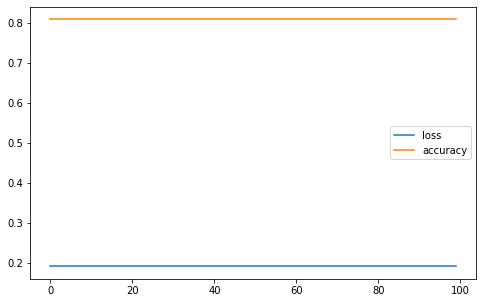

In [24]:
from matplotlib import pyplot as plt
pd.DataFrame(historico.history).plot(figsize=(8,5))
plt.show()

In [25]:
from random import sample

aux = 0
while (aux <= 100):
  sorteados = sample(range(-100, 100), 7)
  #print(sorteados)

  prediction = modelo.predict([sorteados])*100

  if prediction >= 0.8:
    print("numeros: ", sorted(sorteados))
    print("prediction shape:", prediction)
    aux += 1

numeros:  [-86, -71, -30, -20, 33, 34, 85]
prediction shape: [[94.755905]]
numeros:  [-88, -81, -76, 4, 82, 89, 93]
prediction shape: [[46.32295]]
numeros:  [-87, -63, -17, 23, 70, 77, 84]
prediction shape: [[57.157673]]
numeros:  [-47, -32, 21, 52, 55, 80, 91]
prediction shape: [[43.11274]]
numeros:  [-78, -37, 6, 39, 47, 63, 83]
prediction shape: [[0.97379684]]
numeros:  [-67, -55, -48, -37, 30, 31, 50]
prediction shape: [[99.899284]]
numeros:  [-89, -32, 26, 29, 30, 38, 46]
prediction shape: [[99.99897]]
numeros:  [-51, -4, 9, 11, 25, 39, 55]
prediction shape: [[99.93525]]
numeros:  [-25, -23, -18, 10, 44, 57, 82]
prediction shape: [[89.29999]]
numeros:  [-50, -11, -7, 5, 15, 73, 98]
prediction shape: [[92.43453]]
numeros:  [-46, -22, 20, 25, 34, 43, 93]
prediction shape: [[4.1302233]]
numeros:  [-89, -67, -19, 8, 25, 45, 62]
prediction shape: [[99.33026]]
numeros:  [-50, -25, 24, 26, 55, 61, 76]
prediction shape: [[8.026153]]
numeros:  [-92, -59, -55, 14, 19, 59, 85]
prediction sha

KeyboardInterrupt: 